In [5]:
import snap
import collections
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
def q1():
    G = snap.LoadEdgeList(snap.PNGraph, "wiki-Vote.txt", 0, 1)

    cnt_node = 0
    cnt_self_edge = 0
    cnt_directed_edge = 0
    uedge = set()
    cnt_undirected_edge = 0
    reciedge = set()
    cnt_reciprocated_edge = 0
    cnt_zero_outd = 0
    cnt_zero_ind = 0
    cnt_ten_outd = 0
    cnt_ten_ind = 0

    for u in G.Nodes():
        cnt_node += 1
        for v in u.GetOutEdges():
            if v == u.GetId():
                cnt_self_edge += 1
            else:
                cnt_directed_edge += 1
                if (u.GetId(), v) not in uedge and (v, u.GetId()) not in uedge:
                    uedge.add((u.GetId(), v))
                    cnt_undirected_edge += 1
                reciedge.add((u.GetId(), v))
                if (v, u.GetId()) in reciedge:
                    cnt_reciprocated_edge += 1
        if u.GetInDeg() == 0:
            cnt_zero_ind += 1
        if u.GetInDeg() < 10:
            cnt_ten_ind += 1
        if u.GetOutDeg() == 0:
            cnt_zero_outd += 1
        if u.GetOutDeg() > 10:
            cnt_ten_outd += 1

    print("node ", cnt_node)
    print("self edge ", cnt_self_edge)
    print("directed edge ", cnt_directed_edge)
    print("undirected edge ", cnt_undirected_edge)
    print("reciprocated edge ", cnt_reciprocated_edge)
    print("zero out node ", cnt_zero_outd)
    print("zero in node ", cnt_zero_ind)
    print("ten out node ", cnt_ten_outd)
    print("ten in node ", cnt_ten_ind)
    
q1()

node  7115
self edge  0
directed edge  103689
undirected edge  100762
reciprocated edge  2927
zero out node  1005
zero in node  4734
ten out node  1612
ten in node  5165


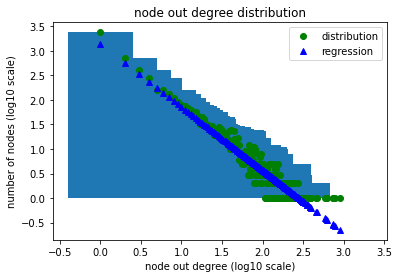

regression:  [-1.28106471  3.1324547 ]


In [9]:
def q2():
    G = snap.LoadEdgeList(snap.PNGraph, "wiki-Vote.txt", 0, 1)

    stat = {}
    for node in G.Nodes():
        if node.GetOutDeg() != 0:
            stat[node.GetOutDeg()] = stat.get(node.GetOutDeg(), 0) + 1
    stat = collections.OrderedDict(sorted(stat.items(), key=lambda x: x[0]))
    x, y = np.array(list(stat.keys()), dtype=np.float64), np.array(list(stat.values()), dtype=np.float64)
    x, y = np.log10(x), np.log10(y)
    plt.bar(x, y)
    plt.plot(x, y, 'go', label='distribution')
    plt.xlabel('node out degree (log10 scale)')
    plt.ylabel('number of nodes (log10 scale)')
    plt.title('node out degree distribution')

    reg = np.polyfit(x, y, deg=1)
    ry = np.polyval(reg, x)
    plt.plot(x, ry, 'b^', label='regression')
    plt.legend()
    plt.show()
    print("regression: ", reg)
    
q2()


In [10]:
def q3():
    G = snap.LoadEdgeList(snap.PNGraph, "stackoverflow-Java.txt", 0, 1)

    components = snap.TCnComV()
    snap.GetWccs(G, components)
    print("Number of WCC: ", components.Len())

    MxComp = snap.GetMxWcc(G)
    cnt_mxc_node = 0
    cnt_mxc_edge = 0
    for _ in MxComp.Nodes():
        cnt_mxc_node += 1
    for _ in MxComp.Edges():
        cnt_mxc_edge += 1
    print("Number of edges and nodes in MxWCC: ", cnt_mxc_node, ' ', cnt_mxc_edge)

    PRankH = snap.TIntFltH()
    snap.GetPageRank(G, PRankH)
    scores = []
    for id in PRankH:
        scores.append((PRankH[id], id))
    res = sorted(scores, reverse=True)[:3]
    print("IDs of top 3 PageRank scores: ", res)

    NIdHubH = snap.TIntFltH()
    NIdAuthH = snap.TIntFltH()
    snap.GetHits(G, NIdHubH, NIdAuthH)
    scores = []
    for id in NIdHubH:
        scores.append((NIdHubH[id], id))
    res = sorted(scores, reverse=True)[:3]
    print("IDs of top 3 hubs by HITS scores: ", res)
    scores = []
    for id in NIdAuthH:
        scores.append((NIdAuthH[id], id))
    res = sorted(scores, reverse=True)[:3]
    print("IDs of top 3 authorities by HITS scores: ", res)
    
q3()

Number of WCC:  10143
Number of edges and nodes in MxWCC:  131188   322486
IDs of top 3 PageRank scores:  [(0.013980540412209575, 992484), (0.010005538895741885, 135152), (0.007103532693128619, 22656)]
IDs of top 3 hubs by HITS scores:  [(0.07336380373389548, 892029), (0.05955074418794487, 1194415), (0.05687564588068672, 359862)]
IDs of top 3 authorities by HITS scores:  [(0.6047239730413133, 22656), (0.2986993488728824, 157882), (0.2839071934144654, 571407)]
